In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# datanya bersih

### Univariate Data Analysis

In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

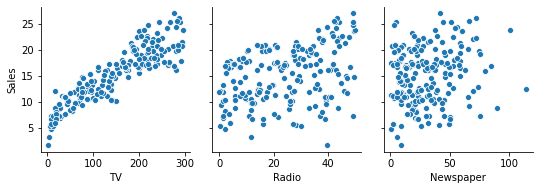

In [8]:
# cek hubungan sales dengan 3 atribut
sns.pairplot(df,x_vars=['TV','Radio', 'Newspaper'], y_vars='Sales')

In [9]:
# dalam bentuk heatmap
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


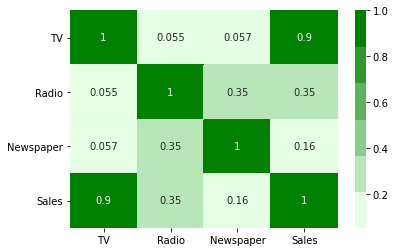

In [10]:
warna = sns.light_palette("green")
sns.heatmap(df.corr(), annot=True, cmap=warna)

So.. `TV` merupakan variabel yang paling berkorelasi terhadap `sales`

## Simple Linear Regression

- Rumusnya `y=c+m1×TV`
- `c`  disebut `intercept`
- `m1` disebut `coefficient`

In [11]:
# split data 
X = df[['TV','Radio']]
y = df['Sales']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
# modeling
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [14]:
reg_predict = regr.predict(X_test)
reg_predict

array([ 9.27075258, 21.18358666, 16.46576691, 19.9860855 , 21.79335273,
       16.17881161, 13.56510331, 15.48886942, 20.84861212, 21.12043782,
       12.42313027, 20.48650943,  8.10690878, 16.96178799, 10.47399682,
       10.06699931, 16.55458351, 14.49902537, 17.4359433 , 12.49814078,
       18.74359607, 12.05794658, 20.39757766, 17.77789097, 16.79388347,
       21.88944456, 20.09943495, 10.79850162, 19.39860578, 15.00508054,
       13.17865637,  9.20727663, 11.9116558 , 16.65294355,  8.4433437 ,
       14.17090881,  9.84219976, 14.32224837, 16.81609806, 16.94615099,
       18.73588188, 15.66034229, 15.68140024, 16.83307861, 13.14240038,
       10.3928243 , 10.3079015 , 20.93677948, 10.05571844,  6.90785544,
       17.8917261 , 18.18681118, 12.45973342, 16.36958328, 19.15328069,
       11.2971664 ,  5.81985832, 10.2428984 , 17.7409874 , 13.1228729 ])

In [15]:
# evaluate

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_predict)

2.545286905758097

In [16]:
# all atributtes
# split data 
X = df.drop('Sales', axis=1)
y = df['Sales']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# train
regr = LinearRegression()
regr.fit(X_train, y_train)

# evaluate
reg_predict = regr.predict(X_test)
mean_squared_error(y_test, reg_predict)

2.6360765623280655

In [17]:
# only 1 atribute -> TV

X = df['TV'].values.reshape(-1,1)
y = df['Sales']


# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# train
regr = LinearRegression()
regr.fit(X_train, y_train)

# evaluate
reg_predict = regr.predict(X_test)
print(mean_squared_error(y_test, reg_predict))

print(regr.intercept_, regr.coef_)

4.077556371826948
6.948683200001357 [0.05454575]


### Hitung manual dari nilai intercept dan coeficient

In [18]:
# c+m1×TV indek 0

print("hitung manual", regr.intercept_ + regr.coef_ * X_test[0][0])
print("predict y", reg_predict[0])
print("real y", y_test.iloc[0])

hitung manual [7.37414007]
predict y 7.374140072745439
real y 6.6


In [19]:
# indek 1
print("hitung manual", regr.intercept_ + regr.coef_ * X_test[1][0])
print("predict y", reg_predict[1])
print("real y", y_test.iloc[1])

hitung manual [19.94148154]
predict y 19.941481544570635
real y 20.7
